In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
dataset = pd.read_csv('german_credit_data.csv')
dataset.head(2)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad


In [32]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [33]:
dataset.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [34]:
dataset.shape

(1000, 11)

In [35]:
dataset.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [36]:
#dataset = dataset.dropna() -- Since we are going to consider only several columns for building ML model, we don't have to loose the datas by the 
# columns which we are not going to consider, so let us drop the columns that has null values when we are going to build the ML model

In [37]:
dataset.duplicated().sum()

0

In [38]:
dataset.head(2)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad


In [39]:
sns.set(style='darkgrid')

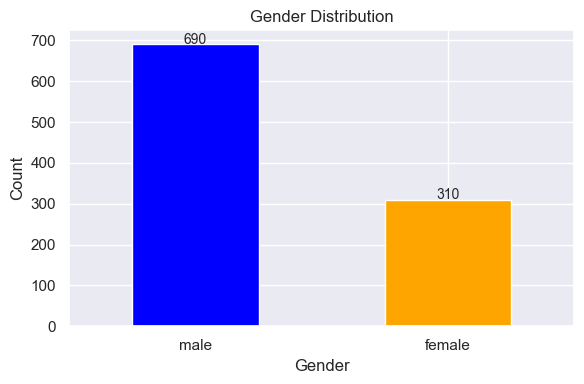

In [40]:
counts = dataset['Sex'].value_counts()

ax = counts.plot(kind='bar', color=['blue', 'orange'], figsize=(6, 4))
for i, v in enumerate(counts):
    ax.text(i, v + 0.5, str(v), ha='center', fontsize=10)

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

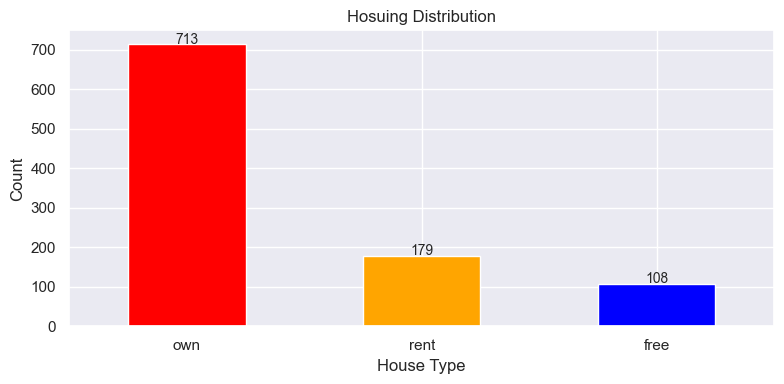

In [41]:
counts = dataset['Housing'].value_counts()

ax = counts.plot(kind='bar', figsize=(8, 4), color=['red', 'orange', 'blue'])
for i, v in enumerate(counts):
    ax.text(i, v + 0.5, str(v), ha='center', fontsize=10)

plt.title('Hosuing Distribution')
plt.xlabel('House Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

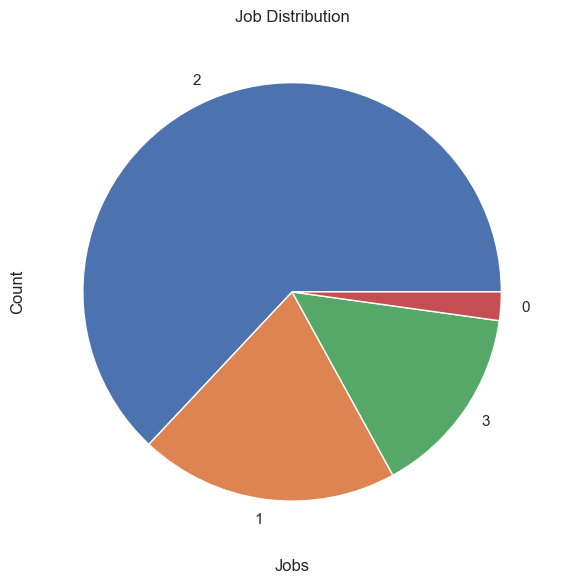

In [42]:
dataset['Job'].value_counts().plot(kind='pie', figsize=(10,6), color=['blue', 'orange'])
plt.title('Job Distribution')
plt.xlabel('Jobs')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

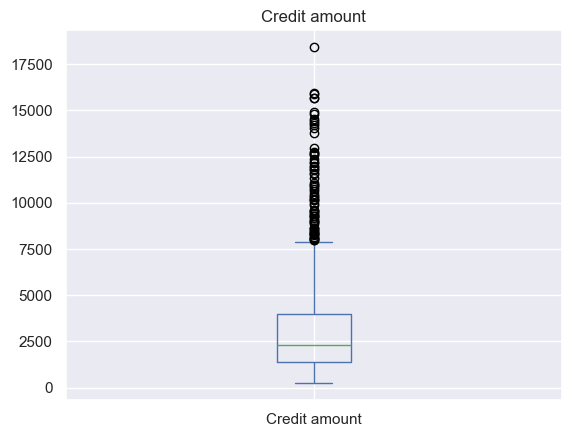

In [43]:
dataset['Credit amount'].plot(kind='box')
plt.title('Credit amount')
plt.show()

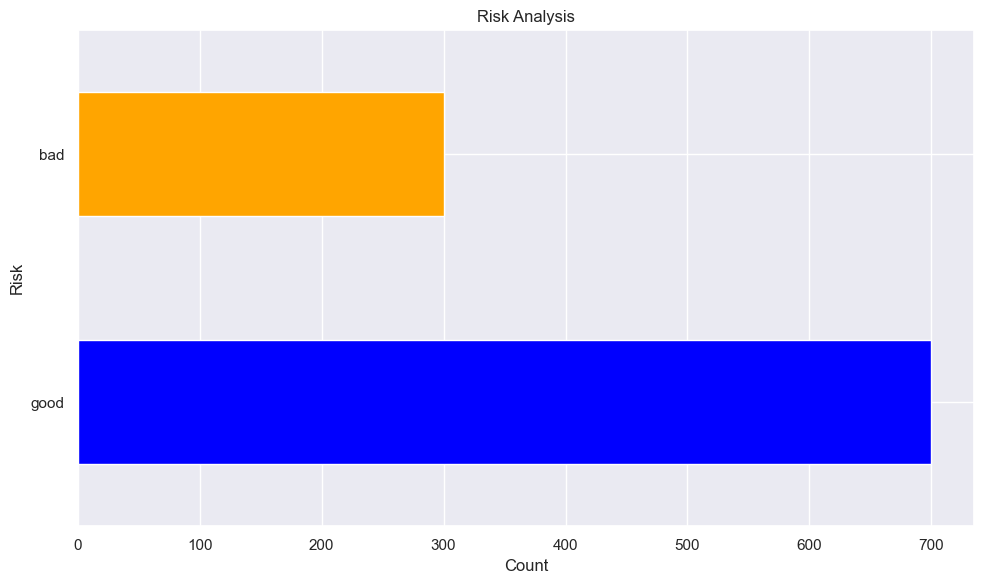

In [44]:
dataset['Risk'].value_counts().plot(kind='barh', figsize=(10,6), color=['blue', 'orange'])
plt.title('Risk Analysis')
plt.xlabel('Count')
plt.ylabel('Risk')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

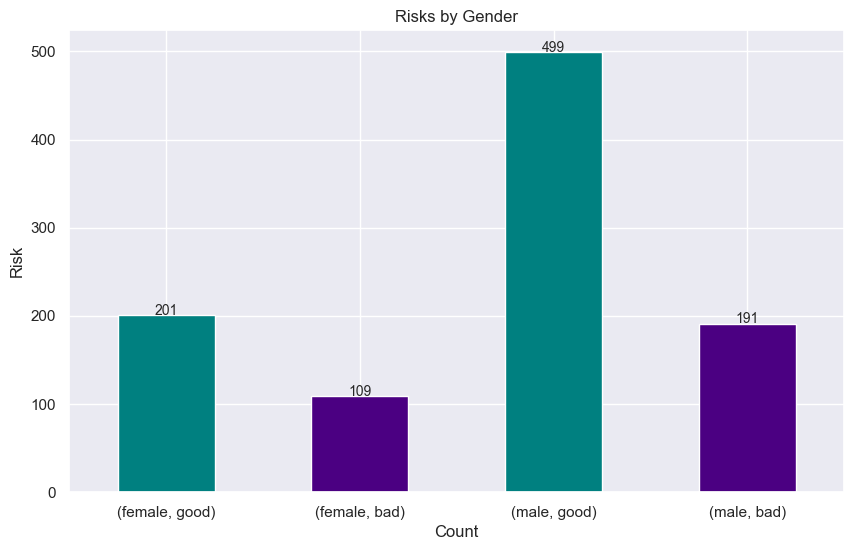

In [45]:
counts = dataset.groupby('Sex')['Risk'].value_counts()

ax = counts.plot(kind='bar', figsize=(10,6), color=['teal', 'indigo'])
for i, v in enumerate(counts):
    ax.text(i, v + 0.5, str(v), ha='center', fontsize=10)

plt.title('Risks by Gender')
plt.xlabel('Count')
plt.ylabel('Risk')
plt.xticks(rotation=0)
plt.show()

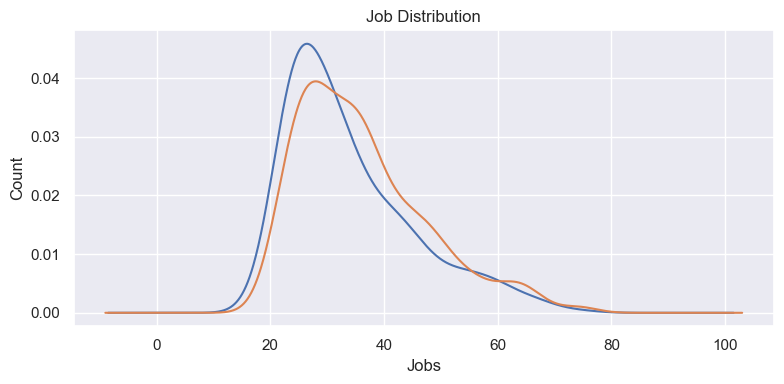

In [46]:
dataset.groupby('Risk')['Age'].plot(kind='kde', figsize=(8,4))
plt.title('Job Distribution')
plt.xlabel('Jobs')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [47]:
dataset.head(2)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad


In [48]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in range(len(dataset.columns)):
    if dataset.dtypes[i] == 'object':
        dataset[dataset.columns[i]] = encoder.fit_transform(dataset[dataset.columns[i]])

dataset.head(2)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,1,2,1,4,0,1169,6,5,1
1,1,22,0,2,1,0,1,5951,48,5,0


In [49]:
corr = dataset.corr()
corr

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
Unnamed: 0,1.000000,-0.010096,-0.001693,-0.027345,0.025452,0.003730,0.005852,0.013488,0.030788,-0.036897,-0.034606
Age,-0.010096,1.000000,0.161694,0.015673,-0.301419,0.084245,0.059751,0.032716,-0.036136,-0.074084,0.091127
Sex,-0.001693,0.161694,1.000000,0.070298,-0.219844,0.034982,0.025578,0.093482,0.081432,-0.063231,0.075493
Job,-0.027345,0.015673,0.070298,1.000000,-0.107191,0.011709,0.040663,0.285385,0.210910,-0.025326,-0.032735
Housing,0.025452,-0.301419,-0.219844,-0.107191,1.000000,-0.006505,-0.022424,-0.135632,-0.157049,0.020633,-0.019315
Saving accounts,0.003730,0.084245,0.034982,0.011709,-0.006505,1.000000,0.222867,0.064630,0.047661,-0.053225,0.178943
Checking account,0.005852,0.059751,0.025578,0.040663,-0.022424,0.222867,1.000000,-0.042705,-0.072013,0.016253,0.350847
Credit amount,0.013488,0.032716,0.093482,0.285385,-0.135632,0.064630,-0.042705,1.000000,0.624984,-0.151720,-0.154739
Duration,0.030788,-0.036136,0.081432,0.210910,-0.157049,0.047661,-0.072013,0.624984,1.000000,-0.083459,-0.214927
Purpose,-0.036897,-0.074084,-0.063231,-0.025326,0.020633,-0.053225,0.016253,-0.151720,-0.083459,1.000000,0.061145


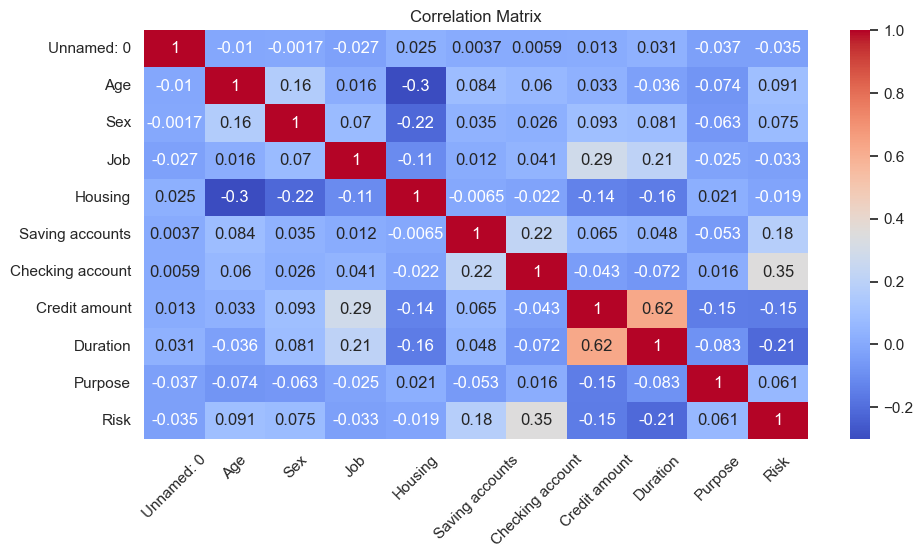

In [50]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [51]:
#dataset = dataset[['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Credit amount','Duration', 'Risk']]
#dataset.head(2)

In [52]:
dataset.isna().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [53]:
x = dataset.drop(['Risk'], axis = 1)
y = dataset['Risk']
x
y

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Risk, Length: 1000, dtype: int32

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [55]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_train, y_train)

svm_y_pred = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)

print(f'SVM Accuracy: {svm_accuracy * 100:.2f}%')
print('SVM Classification Report:')
print(classification_report(y_test, svm_y_pred))
print('SVM Confusion Matrix:')
print(confusion_matrix(y_test, svm_y_pred))
print('\n\n')

from sklearn.linear_model import LogisticRegression 

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'LR Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

SVM Accuracy: 75.50%
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.32      0.44        59
           1       0.77      0.94      0.84       141

    accuracy                           0.76       200
   macro avg       0.72      0.63      0.64       200
weighted avg       0.74      0.76      0.72       200

SVM Confusion Matrix:
[[ 19  40]
 [  9 132]]



LR Accuracy: 76.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.36      0.47        59
           1       0.78      0.93      0.85       141

    accuracy                           0.76       200
   macro avg       0.73      0.64      0.66       200
weighted avg       0.75      0.76      0.73       200

Confusion Matrix:
[[ 21  38]
 [ 10 131]]


In [56]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
dt_y_pred = dt_model.predict(x_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(f'Decision Tree Accuracy: {dt_accuracy * 100:.2f}%')
print('Decision Tree Classification Report:')
print(classification_report(y_test, dt_y_pred))
print('Decision Tree Confusion Matrix:')
print(confusion_matrix(y_test, dt_y_pred))
print("\n\n")

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_y_pred = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f'Random Forest Accuracy: {rf_accuracy * 100:.2f}%')
print('Random Forest Classification Report:')
print(classification_report(y_test, rf_y_pred))
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_test, rf_y_pred))

Decision Tree Accuracy: 64.50%
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.44      0.42        59
           1       0.76      0.73      0.74       141

    accuracy                           0.65       200
   macro avg       0.58      0.59      0.58       200
weighted avg       0.65      0.65      0.65       200

Decision Tree Confusion Matrix:
[[ 26  33]
 [ 38 103]]



Random Forest Accuracy: 77.00%
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.41      0.51        59
           1       0.79      0.92      0.85       141

    accuracy                           0.77       200
   macro avg       0.74      0.66      0.68       200
weighted avg       0.76      0.77      0.75       200

Random Forest Confusion Matrix:
[[ 24  35]
 [ 11 130]]


In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
knn_y_pred = knn_model.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(f'KNN Accuracy: {knn_accuracy * 100:.2f}%')
print('KNN Classification Report:')
print(classification_report(y_test, knn_y_pred))
print('KNN Confusion Matrix:')
print(confusion_matrix(y_test, knn_y_pred))
print("\n\n")

from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
nb_y_pred = nb_model.predict(x_test)
nb_accuracy = accuracy_score(y_test, nb_y_pred)
print(f'Naive Bayes Accuracy: {nb_accuracy * 100:.2f}%')
print('Naive Bayes Classification Report:')
print(classification_report(y_test, nb_y_pred))
print('Naive Bayes Confusion Matrix:')
print(confusion_matrix(y_test, nb_y_pred))

KNN Accuracy: 68.50%
KNN Classification Report:


              precision    recall  f1-score   support

           0       0.46      0.36      0.40        59
           1       0.75      0.82      0.79       141

    accuracy                           0.69       200
   macro avg       0.60      0.59      0.59       200
weighted avg       0.67      0.69      0.67       200

KNN Confusion Matrix:
[[ 21  38]
 [ 25 116]]



Naive Bayes Accuracy: 71.50%
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.36      0.42        59
           1       0.76      0.87      0.81       141

    accuracy                           0.71       200
   macro avg       0.64      0.61      0.62       200
weighted avg       0.69      0.71      0.70       200

Naive Bayes Confusion Matrix:
[[ 21  38]
 [ 19 122]]


In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],               
    'criterion': ['gini', 'entropy', 'log_loss'], 
    'max_depth': [None, 10, 20, 30],                
    'min_samples_split': [2, 5, 10],                
    'min_samples_leaf': [1, 2, 4],                 
    'max_features': ['sqrt', 'log2', None],         
    'bootstrap': [True, False]                      
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)
grid_rf.fit(x_train, y_train)
print("Best Params:", grid_rf.best_params_)        
print("Best CV Score:", grid_rf.best_score_)       
print("Test Accuracy:", grid_rf.score(x_test, y_test))  

Best Params: {'bootstrap': True, 'criterion': 'log_loss', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best CV Score: 0.76125
Test Accuracy: 0.775


In [59]:
from sklearn.metrics import accuracy_score
print("Train Accuracy:", accuracy_score(y_train, grid_rf.predict(x_train)))
print("Test Accuracy:", accuracy_score(y_test, rf_y_pred))

Train Accuracy: 0.93625
Test Accuracy: 0.77


In [60]:
rf_y_pred = rf_model.predict(x_test)
print(np.concatenate((rf_y_pred.reshape(len(rf_y_pred), 1), y_test.to_numpy().reshape(len(y_test), 1)), axis=1))

[[1 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]

In [61]:
x.sample(5)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
689,689,31,1,2,1,3,0,3651,12,1
329,329,28,1,2,1,0,1,1068,6,5
480,480,23,0,1,1,0,1,3573,12,5
813,813,54,1,2,1,0,0,3051,48,2
236,236,23,1,0,1,4,1,14555,6,1


In [63]:
y.iloc[813]

0

In [67]:
user_input = [[54, 1, 2, 1, 0, 0, 3051, 48, 6, 1]]
results = grid_rf.predict(user_input)[0]
print(f"Prediction: {results}")

Prediction: 1
